In [21]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv("diamonds_new.csv")

In [23]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [25]:
### handling null values

In [26]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [27]:
data.shape

(53940, 9)

In [28]:
import matplotlib.pyplot as plt

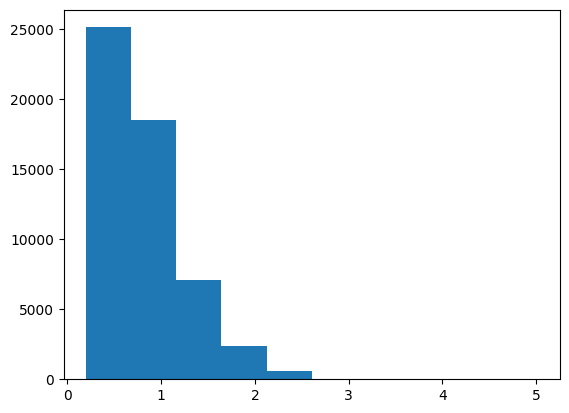

In [29]:
plt.hist(data['carat'])
plt.show()

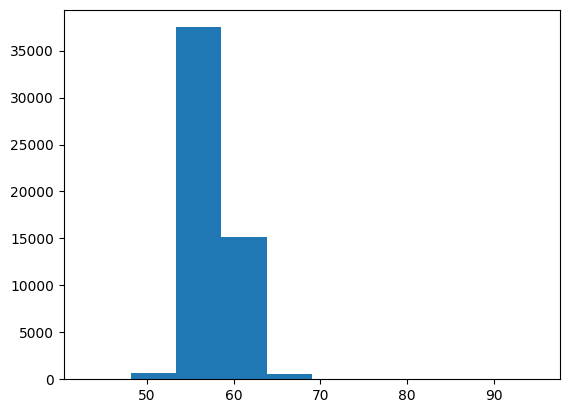

In [30]:
plt.hist(data['table'])
plt.show()

In [31]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [32]:
data[(data['x']==0) | (data['y']==0) | (data['z']==0)].index.to_list()

[11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557]

In [33]:
data2 = data.drop(data[(data['x']==0) | (data['y']==0) | (data['z']==0)].index.to_list())

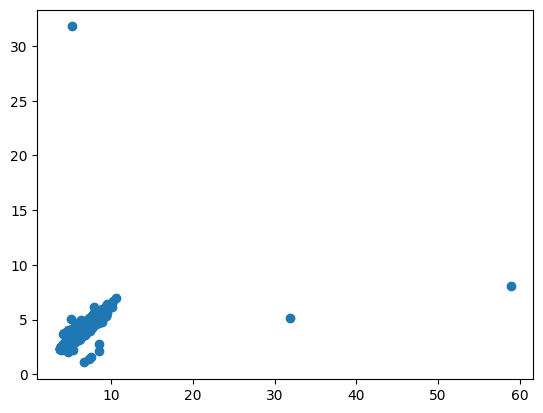

In [34]:
plt.scatter(data2['y'], data2['z'])
plt.show()

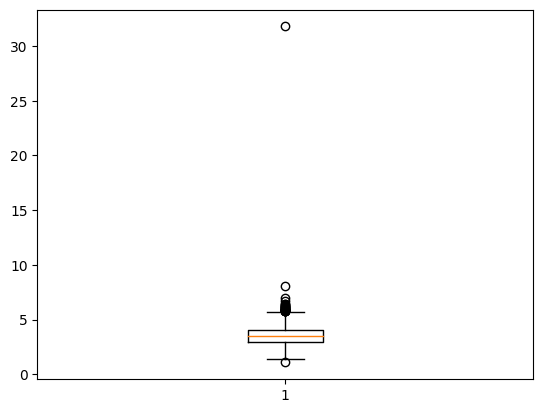

In [35]:
plt.boxplot(data2['z'])
plt.show()

In [36]:
data2[(data2['y'] > 15) | (data2['z'] > 15)].index

Int64Index([24067, 48410, 49189], dtype='int64')

In [37]:
data3 = data2.drop([24067, 48410, 49189])

In [38]:
data3.shape

(53929, 9)

In [39]:
### fill the missing values

In [40]:
data3.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [41]:
car_median = data3['carat'].median()
data3['carat'] = data3['carat'].fillna(car_median)

In [42]:
car_table = data3['table'].median()
data3['table'] = data3['table'].fillna(car_table)

In [43]:
data3['color'].value_counts()

G    11234
E     9795
F     9539
H     8301
D     6774
I     5422
J     2808
Name: color, dtype: int64

In [44]:
data3["color"] = data3['color'].fillna("G")

In [45]:
data3.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [46]:
data3.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [47]:
y = data3['price_new']
x = data3.drop("price_new", axis=1)

In [48]:
x = pd.get_dummies(x)

In [49]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()

In [50]:
x = mn.fit_transform(x)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state= 134)

In [53]:
### machine learning model ### how much r squred value and mean squared error ### activity

In [54]:
result_df={}

In [62]:
from sklearn.metrics import mean_squared_error

In [56]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
result_df.update({type(model).__name__: {'mean_squared_error':mse}})
pd.DataFrame(result_df)


,LinearRegression
mean_squared_error,310612.431755


In [75]:
from sklearn.svm import SVR
model=SVR()
model.fit(x_train,y_train)


SVR()

In [59]:
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
result_df.update({type(model).__name__: {'mean_squared_error':mse}})
pd.DataFrame(result_df)

,LinearRegression,SVR
mean_squared_error,310612.431755,3.218836e+06


In [60]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
result_df.update({type(model).__name__: {'mean_squared_error':mse}})
pd.DataFrame(result_df)

,LinearRegression,SVR,KNeighborsRegressor
mean_squared_error,310612.431755,3.218836e+06,132880.825935


In [63]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
result_df.update({type(model).__name__: {'mean_squared_error':mse}})
pd.DataFrame(result_df)

,LinearRegression,SVR,KNeighborsRegressor,DecisionTreeRegressor
mean_squared_error,310612.431755,3.218836e+06,132880.825935,132971.994229


In [65]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [66]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
result_df.update({type(model).__name__: {'mean_squared_error':mse}})
pd.DataFrame(result_df)

,LinearRegression,SVR,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
mean_squared_error,310612.431755,3.218836e+06,132880.825935,132971.994229,74197.726601


In [67]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
result_df.update({type(model).__name__: {'mean_squared_error':mse}})
pd.DataFrame(result_df)

,LinearRegression,SVR,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor
mean_squared_error,310612.431755,3.218836e+06,132880.825935,132971.994229,74197.726601,133039.083859


In [68]:
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
result_df.update({type(model).__name__: {'mean_squared_error':mse}})
pd.DataFrame(result_df)

,LinearRegression,SVR,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
mean_squared_error,310612.431755,3.218836e+06,132880.825935,132971.994229,74197.726601,133039.083859,499853.808115


In [69]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
result_df.update({type(model).__name__: {'mean_squared_error':mse}})
pd.DataFrame(result_df)

,LinearRegression,SVR,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,XGBRegressor
mean_squared_error,310612.431755,3.218836e+06,132880.825935,132971.994229,74197.726601,133039.083859,499853.808115,75575.389644


In [76]:
from tensorflow.keras.models import Sequential

In [77]:
from tensorflow.keras.layers import Dense

In [ ]:
x.shape

(53929, 25)

In [ ]:
### input = 25, hidden1 = 32, hidden2 = 16, hidden3 = 8, output = 1

In [ ]:
model1 = Sequential()
model1.add(Dense(32, activation = "relu", input_shape = (25,)))
model1.add(Dense(16, activation = "relu"))
model1.add(Dense(8, activation = "relu"))

model1.add(Dense(1, activation = None))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### compile this model

In [ ]:
### gradient descent

In [ ]:
model1.compile(optimizer = "sgd", loss = "mean_squared_error")

In [ ]:
#### train the wights using backpropogation algorithm

In [ ]:
model1.fit(x_train, y_train, epochs = 10, batch_size = 128)

Epoch 1/10
338/338 [==============================] - 5s 3ms/step - loss: 36876281946884350647730176.0000
Epoch 2/10
338/338 [==============================] - 1s 3ms/step - loss: 480170231226957824.0000
Epoch 3/10
338/338 [==============================] - 1s 3ms/step - loss: 562634227712.0000
Epoch 4/10
338/338 [==============================] - 1s 3ms/step - loss: 4636527.5000
Epoch 5/10
338/338 [==============================] - 1s 3ms/step - loss: 3998133.5000
Epoch 6/10
338/338 [==============================] - 1s 4ms/step - loss: 3997989.5000
Epoch 7/10
338/338 [==============================] - 1s 4ms/step - loss: 3998196.2500
Epoch 8/10
338/338 [==============================] - 1s 3ms/step - loss: 3998024.5000
Epoch 9/10
338/338 [==============================] - 1s 3ms/step - loss: 3997864.5000
Epoch 10/10
338/338 [==============================] - 1s 3ms/step - loss: 3998211.2500


In [ ]:
model1.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 3895439.5000


3895439.5

model2 

In [ ]:
model2 = Sequential()
model2.add(Dense(64, input_shape = (25,), activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(1, activation = None))

In [ ]:
model2.compile(optimizer = "sgd", loss = "mean_squared_error")

In [ ]:
model2.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 2s 4ms/step - loss: nan
Epoch 2/30
338/338 [==============================] - 2s 5ms/step - loss: nan
Epoch 3/30
338/338 [==============================] - 1s 4ms/step - loss: nan
Epoch 4/30
338/338 [==============================] - 1s 4ms/step - loss: nan
Epoch 5/30
338/338 [==============================] - 1s 3ms/step - loss: nan
Epoch 6/30
338/338 [==============================] - 1s 4ms/step - loss: nan
Epoch 7/30
338/338 [==============================] - 1s 4ms/step - loss: nan
Epoch 8/30
338/338 [==============================] - 1s 4ms/step - loss: nan
Epoch 9/30
338/338 [==============================] - 1s 4ms/step - loss: nan
Epoch 10/30
338/338 [==============================] - 1s 4ms/step - loss: nan
Epoch 11/30
338/338 [==============================] - 1s 4ms/step - loss: nan
Epoch 12/30
338/338 [==============================] - 2s 5ms/step - loss: nan
Epoch 13/30
338/338 [==============================] - 1s 3ms

In [78]:
from tensorflow.keras.layers import Dropout

In [ ]:
model3 = Sequential()
model3.add(Dense(128, input_shape = (25,), activation = "relu"))
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(32, activation = "relu"))
model3.add(Dense(16, activation = "relu"))
model3.add(Dense(1, activation = None))

In [ ]:
model3.compile(optimizer = "adam", loss = "mean_squared_error")

In [ ]:
model3.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 5s 4ms/step - loss: 2039674.0000
Epoch 2/30
338/338 [==============================] - 1s 4ms/step - loss: 220265.0469
Epoch 3/30
338/338 [==============================] - 1s 4ms/step - loss: 205431.2344
Epoch 4/30
338/338 [==============================] - 1s 4ms/step - loss: 195712.4844
Epoch 5/30
338/338 [==============================] - 1s 4ms/step - loss: 190306.5938
Epoch 6/30
338/338 [==============================] - 1s 4ms/step - loss: 188955.6562
Epoch 7/30
338/338 [==============================] - 1s 4ms/step - loss: 177024.6250
Epoch 8/30
338/338 [==============================] - 2s 5ms/step - loss: 177018.1562
Epoch 9/30
338/338 [==============================] - 2s 5ms/step - loss: 184000.8906
Epoch 10/30
338/338 [==============================] - 1s 4ms/step - loss: 178087.9844
Epoch 11/30
338/338 [==============================] - 1s 4ms/step - loss: 187011.8438
Epoch 12/30
338/338 [==============================

In [ ]:
model3.evaluate(x_test, y_test)

338/338 [==============================] - 2s 5ms/step - loss: 157586.9531


157586.953125

In [70]:
### 157586

result_df.update({'ANN':{'mean_squared_error':157586.95}})
result_df=pd.DataFrame(result_df).transpose()



In [71]:
result_df

,mean_squared_error
LinearRegression,3.106124e+05
SVR,3.218836e+06
KNeighborsRegressor,1.328808e+05
DecisionTreeRegressor,1.329720e+05
RandomForestRegressor,7.419773e+04
GradientBoostingRegressor,1.330391e+05
AdaBoostRegressor,4.998538e+05
XGBRegressor,7.557539e+04
ANN,1.575870e+05


In [74]:
result_df['mean_squared_error'].min()

74197.72660137006